In [12]:
import importlib.util
import os

# Define the path to the synthetic_data_generator.py file
module_path = os.path.abspath(os.path.join('..', 'src', 'synthetic', 'synthetic_data_generator.py'))

# Load the module dynamically
spec = importlib.util.spec_from_file_location("synthetic_data_generator", module_path)
synthetic_data_generator = importlib.util.module_from_spec(spec)
spec.loader.exec_module(synthetic_data_generator)
SyntheticDataGenerator = synthetic_data_generator.SyntheticDataGenerator

In [13]:
#from src.synthetic.synthetic_data_generator import SyntheticDataGenerator
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
# Generate synthetic data
generator = SyntheticDataGenerator(start_date='2024-01-01', num_days=365)
synthetic_data = generator.generate_multi_channel_data()

In [15]:
# Display the first few rows
print(synthetic_data.head())

        Date  Impressions  Clicks       Spend      Revenue  Seasonality  \
0 2024-01-01        86141     771  108.397849    95.731552     0.000000   
1 2024-01-02        72811     457  621.612982  1178.992770     0.017213   
2 2024-01-03        61984     720  895.227425  1610.797765     0.034422   
3 2024-01-04        11396     910  889.654200  1663.401778     0.051620   
4 2024-01-05        43026     806  837.195509  1072.021399     0.068802   

        CTR       CPC      ROAS     Channel  
0  0.008950  0.140594  0.883150  Google Ads  
1  0.006277  1.360203  1.896667  Google Ads  
2  0.011616  1.243371  1.799317  Google Ads  
3  0.079853  0.977642  1.869717  Google Ads  
4  0.018733  1.038704  1.280491  Google Ads  


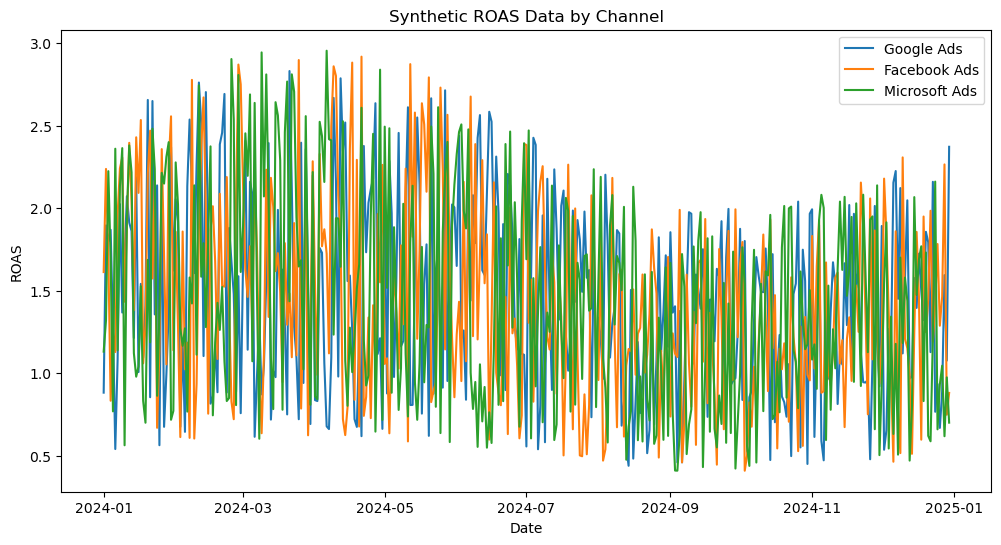

In [16]:
# Visualize the synthetic data
plt.figure(figsize=(12, 6))
for channel in synthetic_data['Channel'].unique():
    channel_data = synthetic_data[synthetic_data['Channel'] == channel]
    plt.plot(channel_data['Date'], channel_data['ROAS'], label=channel)

plt.title('Synthetic ROAS Data by Channel')
plt.xlabel('Date')
plt.ylabel('ROAS')
plt.legend()
plt.show()

In [17]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(synthetic_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Synthetic Data')
plt.show()


ValueError: could not convert string to float: 'Google Ads'

<Figure size 1000x800 with 0 Axes>

In [18]:
# Save synthetic data
synthetic_data.to_csv('../data/synthetic/synthetic_ad_data.csv', index=False)
print("Synthetic data saved to '../data/synthetic/synthetic_ad_data.csv'")

Synthetic data saved to '../data/synthetic/synthetic_ad_data.csv'
